In [2]:
import cv2, torch
import sys
sys.path.append('../src')
from ImageToStringPreprocessing import ImageToStringPreprocessing
from ImageToStringNet import ImageToStringNet, classes as ImageToStringClasses

In [44]:
image_path = 'giraffa100%.png'
image_bgr = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

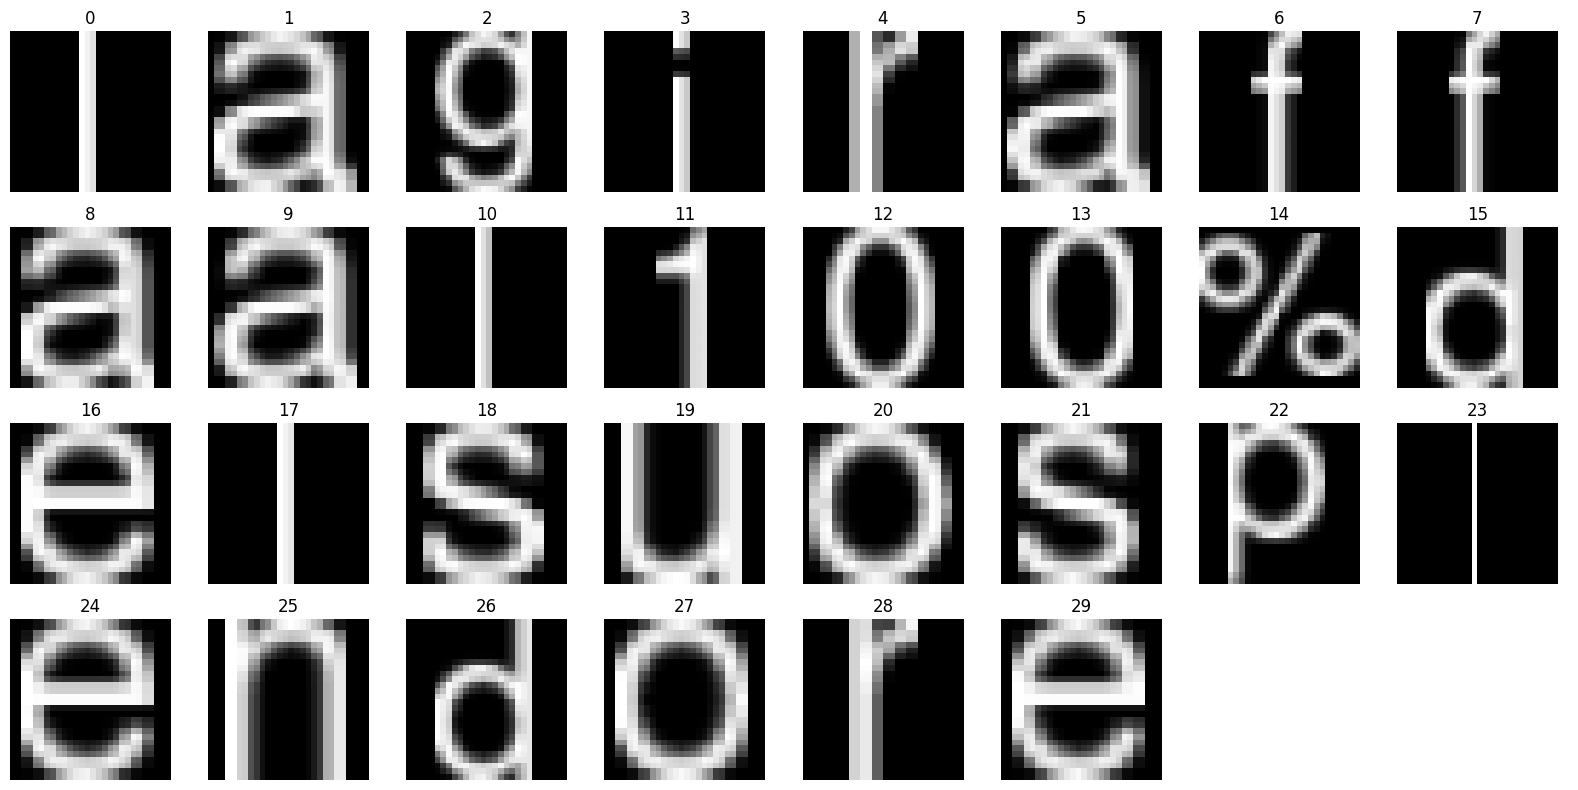

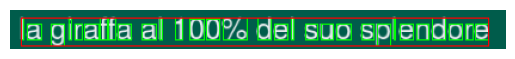

In [4]:
preprocessor = ImageToStringPreprocessing(image_rgb)

preprocessor.show_letters()
preprocessor.show_bboxed_image()

In [ ]:
preprocessor.get_info()[0]

{'bboxes': (np.int32(9), np.int32(7), np.int32(2), np.int32(18)),
 'img': array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 226,
         213, 200,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 226,
         213, 200,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 226,
         213, 200,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 226,
         213, 200,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 226,
         213, 200,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 226,
         213,

In [6]:
preprocessor.get_info()[0]['img'].shape

(28, 28)

In [7]:
from torch import Tensor

In [8]:
class ImageToStringPostprocessing:
    def __init__(self):
        pass

    def add_spaces(str, info):
        return str

In [49]:
from ImageToStringClassifier import ImageToStringClassifier
classifier = ImageToStringClassifier(image_bgr)
classifier.get_string()

'la giraffa al 100% del suO splendore'

In [ ]:
#[(i, x['dist_top'], x['dist_bottom']) for i, x in enumerate(classifier.preprocessor.get_info())]

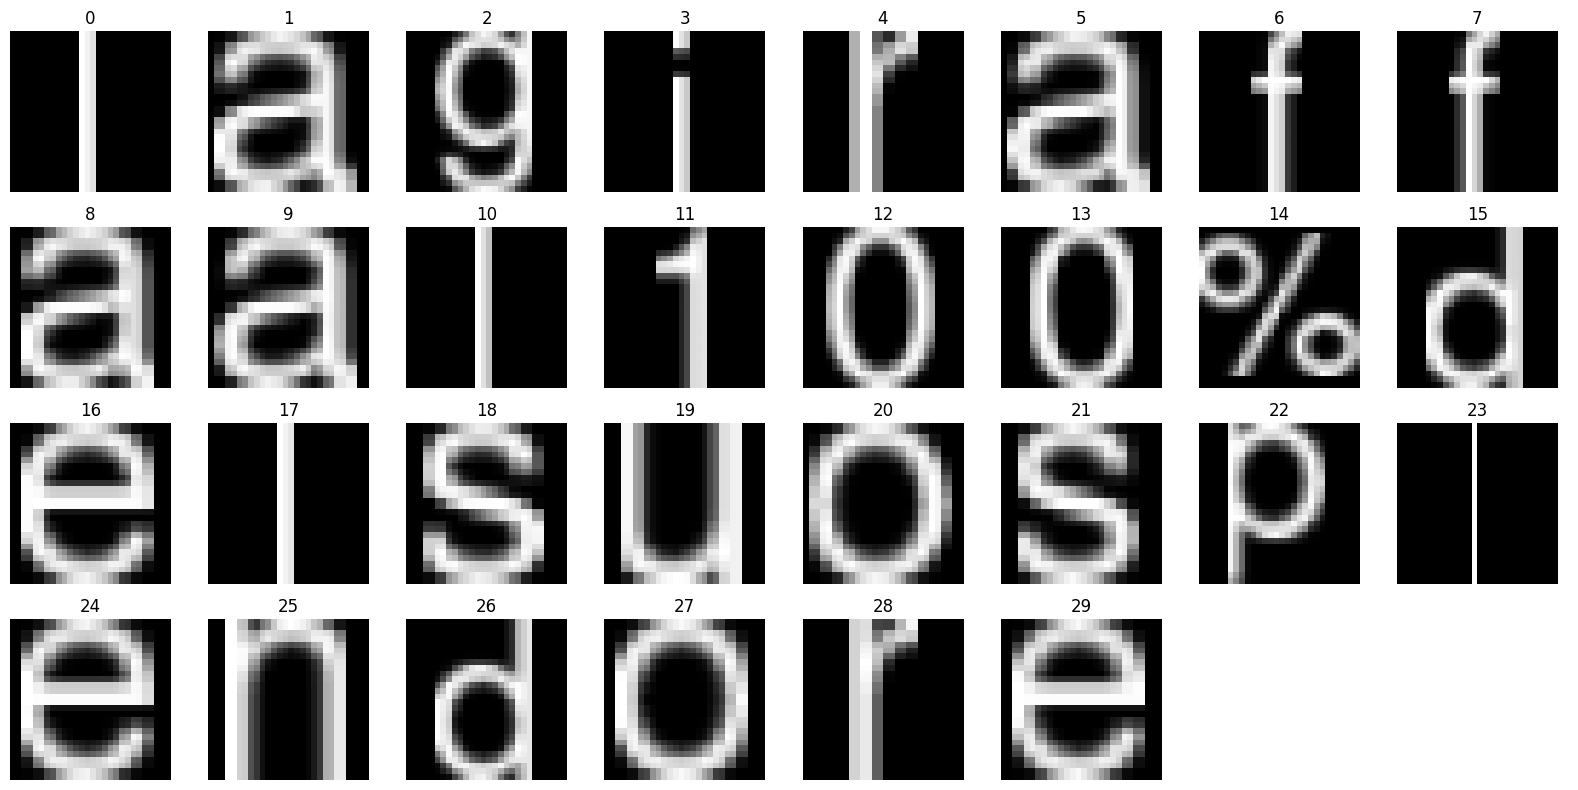

In [ ]:
classifier.preprocessor.show_letters()

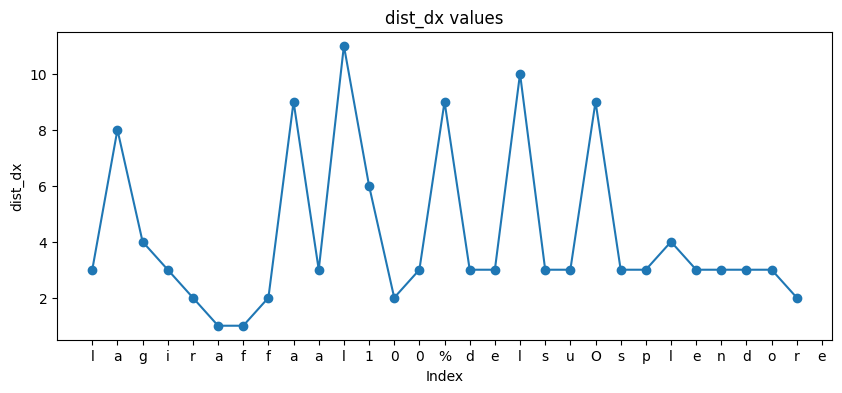

In [ ]:
import matplotlib.pyplot as plt

dist_dx = [x['dist_dx'] for x in preprocessor.get_info() if x['dist_dx'] is not None]
labels = list(classifier._classify())
plt.figure(figsize=(10, 4))
plt.plot(dist_dx, marker='o')
plt.title('dist_dx values')
plt.xlabel('Index')
plt.ylabel('dist_dx')
plt.xticks(ticks=range(len(labels)), labels=labels)
plt.show()

In [69]:
car_conf = {'c', 'j', 'k', 'o', 'p', 's', 'u', 'v', 'w', 'x', 'z',
            'C', 'J', 'K', 'O', 'P', 'S', 'U', 'V', 'W', 'X', 'Z'}

# Ottieni la stringa dal classificatore
output_str = classifier.get_string()

# Filtra i caratteri
str_non_conf = ''.join([car for car in output_str if car not in car_conf])
str_conf = ''.join([car for car in output_str if car in car_conf])

print("Stringa:", output_str)
print("Lettere NON escluse:", str_non_conf)
print("Lettere escluse:", str_conf)

print(classifier.preprocessor.get_info()[0]['dist_top'])
print(classifier.preprocessor.get_info()[1]['dist_top'])



Stringa: la giraffa al 100% del suO splendore
Lettere NON escluse: la giraffa al 100% del  lendre
Lettere escluse: suOspo
0.0
21.73913043478261


In [75]:
output_str = classifier.get_string()
output_str_nospace = output_str.replace(" ", "")

In [76]:
len(output_str_nospace)

30

In [84]:
info_w_char = [{**x[0], 'char': x[1] } for x in zip(classifier.preprocessor.get_info(), output_str_nospace)]

In [86]:
[x for x in info_w_char if x['char'] == 'a']

[{'bboxes': (np.int32(14), np.int32(12), np.int32(12), np.int32(13)),
  'img': array([[  0,   1,   1,  19,  21,  76,  87, 151, 172, 201, 215, 233, 245,
          236, 227, 213, 193, 163, 103,  83,  24,  20,   1,   1,   0,   0,
            0,   0],
         [  0,   1,   1,  19,  21,  76,  87, 151, 172, 201, 215, 233, 245,
          236, 227, 213, 193, 163, 103,  83,  24,  20,   1,   1,   0,   0,
            0,   0],
         [  0,  16,  16, 124, 134, 205, 219, 221, 222, 212, 206, 206, 205,
          207, 208, 216, 228, 227, 226, 204, 138, 119,  21,  19,   0,   0,
            0,   0],
         [  0,  19,  19, 144, 155, 228, 243, 234, 231, 214, 205, 201, 198,
          202, 205, 217, 234, 239, 248, 226, 159, 137,  25,  23,   0,   0,
            0,   0],
         [  0,  66,  66, 209, 222, 223, 223, 163, 144, 112,  97,  90,  84,
           90,  97, 119, 149, 177, 234, 226, 204, 181,  64,  58,   0,   0,
            0,   0],
         [  0,  87,  87, 238, 252, 220, 214, 132, 105,  68,  49,  40

In [ ]:
car_conf = {'c', 'j', 'k', 'o', 'p', 's', 'u', 'v', 'w', 'x', 'z',
            'C', 'J', 'K', 'O', 'P', 'S', 'U', 'V', 'W', 'X', 'Z'}

info_w_char_conf = [entry for entry in info_w_char if entry['char'] in car_conf]

print(output_str_nospace)
print("Caratteri confondibili trovati:", [e['char'] for e in info_w_char_conf])

car_non_conf_ = {'t', 'i', 'd', 'f', 'h', 'j', 'k', 'l', 'b'}

first_valid_entry = next(
    (entry for entry in info_w_char if entry['char'] not in car_conf),
    None
)

if first_valid_entry:
    print("Primo carattere valido trovato:", first_valid_entry['char'])
else:
    print("Nessun carattere valido trovato.")

car_non_conf_maiusc = {'A', 'B', 'D', 'E', 'F', 'G', 'H', 'I', 'L', 'M', 'N', 'Q', 'R', 'T', 'Y'}
car_non_conf_minusc_a = {'g', 'm', 'y', 'o', 's', 'e', 'z', 'u', 'a', 'r', 'n', 'c', 'v', 'p', 'w', 'x', 'q'}
car_non_conf_minusc_b = {'t', 'i', 'd', 'f', 'h', 'j', 'k', 'l', 'b'}

import math
delta = 0.02

# aggiungere controlli che se first_valid_entry è None allora esci
if first_valid_entry['char'] in car_non_conf_maiusc:
    for entry in info_w_char_conf:
        if math.isclose(first_valid_entry['dist_top'], entry['dist_top'], abs_tol=delta):
            if entry['char'].islower():
                entry['char'].upper()


math.isclose








if first_valid_entry['char'] in car_non_conf_minusc_a:
    for entry in info_w_char_conf:
        if first_valid_entry['dist_top'] > entry['dist_top']:
            # melo
if first_valid_entry['char'] in car_non_conf_minusc_b:
    for entry in info_w_char_conf:
        if first_valid_entry['dist_top'] < entry['dist_top']:
            print(1)


lagiraffaal100%delsuOsplendore
Caratteri confondibili trovati: ['s', 'u', 'O', 's', 'p', 'o']
Primo carattere valido trovato: l
